In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV files
categories = pd.read_csv("DataGrocery/categories.csv")
cities = pd.read_csv("DataGrocery/cities.csv")
countries = pd.read_csv("DataGrocery/countries.csv")
customers = pd.read_csv("DataGrocery/customers.csv")
employees = pd.read_csv("DataGrocery/employees.csv")
products = pd.read_csv("DataGrocery/products.csv")
sales = pd.read_csv("DataGrocery/sales.csv")

In [9]:
# Merge necessary tables
sales = sales.merge(products, on="ProductID", how="left")
sales = sales.merge(categories, on="CategoryID", how="left")
sales = sales.merge(customers, on="CustomerID", how="left")
sales = sales.merge(cities, left_on="CityID", right_on="CityID", how="left")
sales = sales.merge(countries, left_on="CountryID", right_on="CountryID", how="left")

# -------------------------
# 3. Filter only United States sales (CountryID == 32)
# -------------------------
sales = sales[sales["CountryID"] == 32]

# Define U.S. regions (based on CityName, manually mapped)
northeast = [
    "Buffalo", "Boston", "New York", "Philadelphia", "Pittsburgh", "Newark", "Rochester", "Yonkers", "Jersey"
]
south = [
    "Virginia Beach", "Atlanta", "Norfolk", "Little Rock", "Baton Rouge", "Miami", "Mobile", "New Orleans",
    "Charlotte", "Jacksonville", "Hialeah", "Arlington", "Memphis", "Dallas", "Corpus Christi", "Montgomery",
    "Greensboro", "Tulsa", "Raleigh", "Shreveport", "Tampa", "San Antonio", "Birmingham", "Louisville", 
    "Oklahoma", "St. Petersburg", "Garland"
]
midwest = [
    "Dayton", "Chicago", "Toledo", "Akron", "Cleveland", "Detroit", "Indianapolis", "St. Louis", "Omaha", 
    "Milwaukee", "Des Moines", "Wichita", "Fort Wayne", "Cincinnati", "Madison", "Columbus", "Kansas", 
    "St. Paul", "Grand Rapids"
]
southwest = [
    "Fremont", "Austin", "Riverside", "El Paso", "Las Vegas", "Albuquerque", "Tucson", "San Francisco", 
    "Long Beach", "Anaheim", "Glendale", "Bakersfield", "Denver", "Stockton", "Mesa", "Phoenix", "Santa Ana",
    "San Diego", "Sacramento", "Aurora", "San Jose", "Los Angeles", "Oakland"
]
northwest = [
    "Spokane", "Tacoma", "Portland", "Seattle"
]
# In our U.S. cities list, Anchorage (ID 68) and Honolulu (ID 72) are present
outside_us = [
    "Anchorage", "Honolulu"
]

def assign_region(city):
    if city in northeast:
        return "Northeast"
    elif city in south:
        return "South"
    elif city in midwest:
        return "Midwest"
    elif city in southwest:
        return "Southwest"
    elif city in northwest:
        return "Northwest"
    elif city in outside_us:
        return "Outside Contiguous US"
    else:
        return "Unknown"

sales["Region"] = sales["CityName"].apply(assign_region)

In [10]:
perishable_ids = {2, 4, 6, 7, 9, 10, 11}

sales["ProductType"] = sales["CategoryID"].apply(
    lambda cid: "Perishable" if cid in perishable_ids else "Non-Perishable"
)

In [11]:
# Calculate revenue per sale
sales["Revenue"] = sales["Quantity"] * sales["Price"]

# Aggregate total revenue per product by Region and ProductType
agg = sales.groupby(["Region", "ProductType", "ProductName"])["Revenue"].sum().reset_index()

# Identify the best-selling product per Region and ProductType (highest revenue)
best_sellers = agg.loc[agg.groupby(["Region", "ProductType"])["Revenue"].idxmax()]

# Display the aggregated best-seller results
print("Best-Selling Products by Region and Product Type:")
print(best_sellers)



Best-Selling Products by Region and Product Type:
                    Region     ProductType                 ProductName  \
38                 Midwest  Non-Perishable                   Tia Maria   
92                 Midwest      Perishable           Lettuce - Treviso   
145              Northeast  Non-Perishable                      Cassis   
252              Northeast      Perishable              Shrimp - 31/40   
308              Northwest  Non-Perishable                   Tia Maria   
362              Northwest      Perishable           Lettuce - Treviso   
421  Outside Contiguous US  Non-Perishable  Cookie Chocolate Chip With   
522  Outside Contiguous US      Perishable              Shrimp - 31/40   
578                  South  Non-Perishable                   Tia Maria   
657                  South      Perishable              Shrimp - 31/40   
713              Southwest  Non-Perishable                   Tia Maria   
792              Southwest      Perishable              Shrimp

C:\temp\ipykernel_72204\3714362379.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


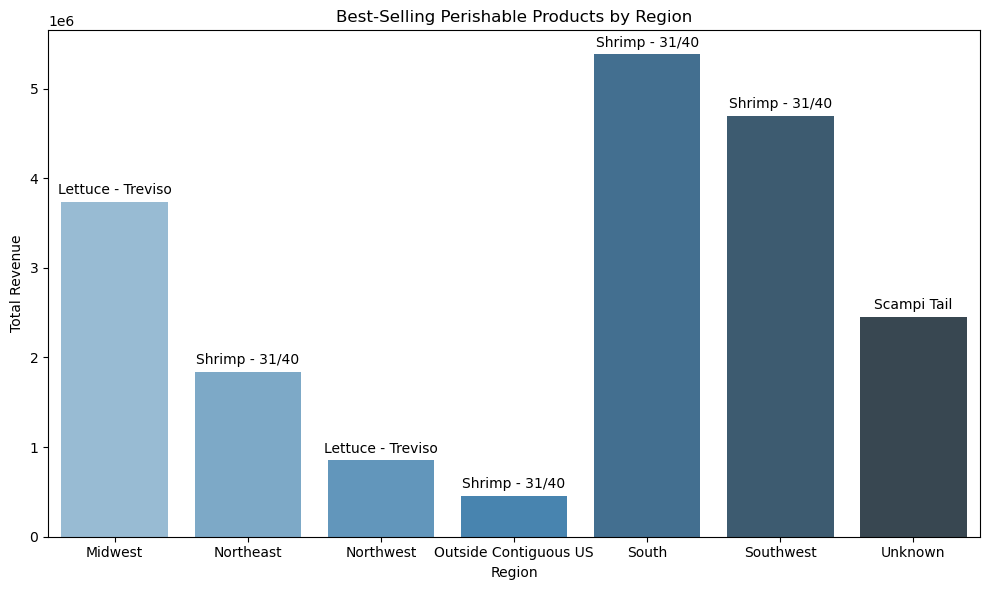

C:\temp\ipykernel_72204\3714362379.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


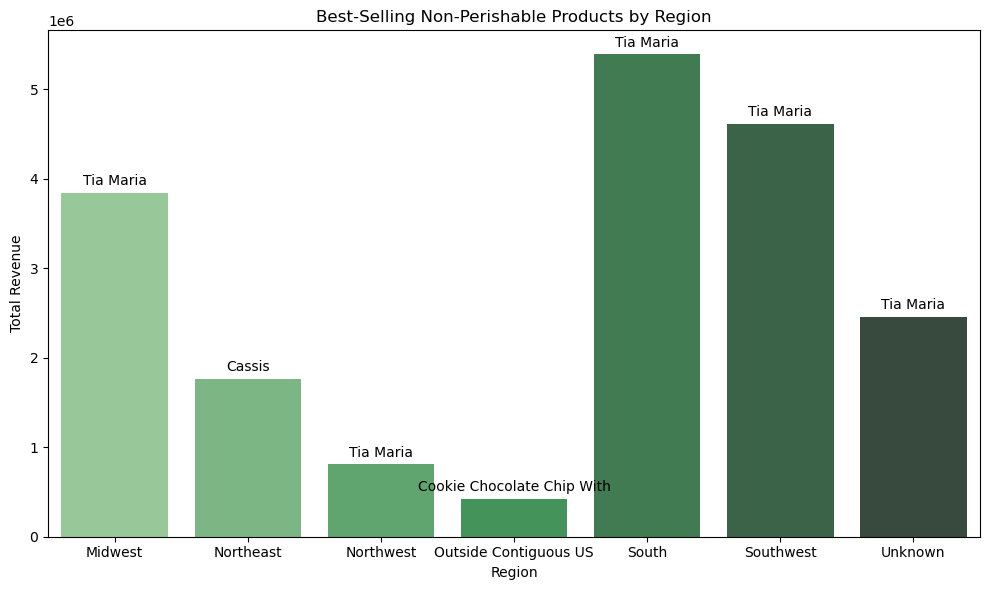

In [12]:
# Filter the best_sellers DataFrame for each product type
perishable_best = best_sellers[best_sellers["ProductType"] == "Perishable"].copy()
non_perishable_best = best_sellers[best_sellers["ProductType"] == "Non-Perishable"].copy()

# To ensure consistent ordering on the x-axis, sort by Region
perishable_best.sort_values("Region", inplace=True)
non_perishable_best.sort_values("Region", inplace=True)

# -------------------------
# Plot 1: Best-Selling Perishable Products by Region
# -------------------------
plt.figure(figsize=(10,6))
ax1 = sns.barplot(
    data=perishable_best, 
    x="Region", 
    y="Revenue", 
    palette="Blues_d"
)
plt.title("Best-Selling Perishable Products by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")

# Annotate each bar with the product name
for i, patch in enumerate(ax1.patches):
    # Get the bar's height and center position
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    # Use the product name from the corresponding row
    product_name = perishable_best.iloc[i]["ProductName"]
    # Annotate above the bar
    ax1.text(x_center, height + (0.01 * perishable_best["Revenue"].max()), product_name,
             ha="center", va="bottom", fontsize=10, color="black")
    
plt.tight_layout()
plt.show()

# -------------------------
# Plot 2: Best-Selling Non-Perishable Products by Region
# -------------------------
plt.figure(figsize=(10,6))
ax2 = sns.barplot(
    data=non_perishable_best, 
    x="Region", 
    y="Revenue", 
    palette="Greens_d"
)
plt.title("Best-Selling Non-Perishable Products by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")

# Annotate each bar with the product name
for i, patch in enumerate(ax2.patches):
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    product_name = non_perishable_best.iloc[i]["ProductName"]
    ax2.text(x_center, height + (0.01 * non_perishable_best["Revenue"].max()), product_name,
             ha="center", va="bottom", fontsize=10, color="black")
    
plt.tight_layout()
plt.show()

Best-Selling Products by Region and Product Type (Quantity):
                    Region     ProductType                  ProductName  \
8                  Midwest  Non-Perishable       Cake - Mini Cheesecake   
129                Midwest      Perishable         Thyme - Lemon, Fresh   
165              Northeast  Non-Perishable  Pastry - Butterscotch Baked   
214              Northeast      Perishable                   Dried Figs   
322              Northwest  Non-Perishable  Wine - White, Colubia Cresh   
395              Northwest      Perishable   Steam Pan - Half Size Deep   
448  Outside Contiguous US  Non-Perishable                   Water, Tap   
509  Outside Contiguous US      Perishable           Pickerel - Fillets   
562                  South  Non-Perishable     Kellogs Special K Cereal   
643                  South      Perishable  Pepper - Paprika, Hungarian   
726              Southwest  Non-Perishable          Wine - Toasted Head   
776              Southwest      Perisha

C:\temp\ipykernel_72204\743061394.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


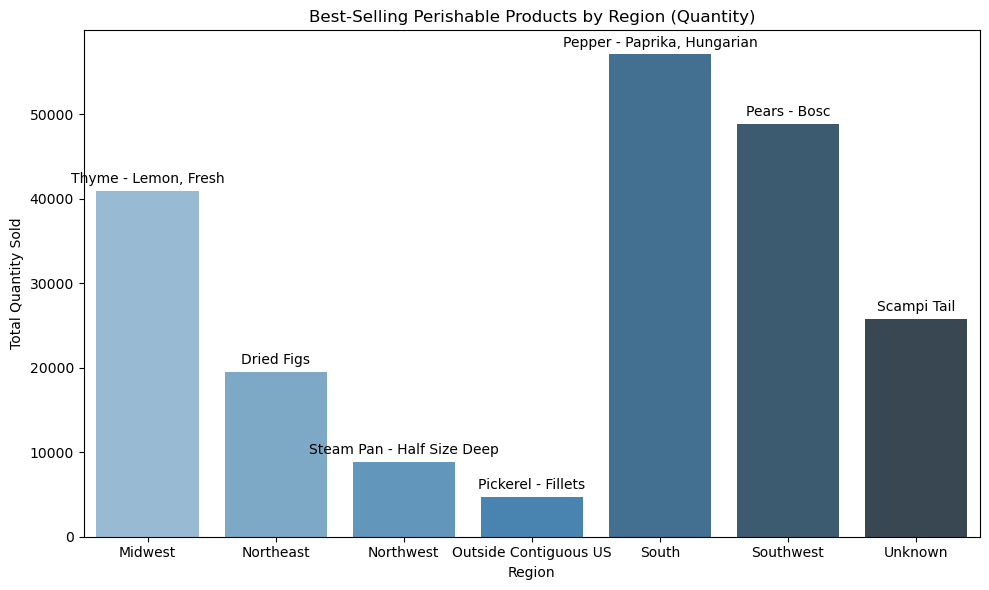

C:\temp\ipykernel_72204\743061394.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


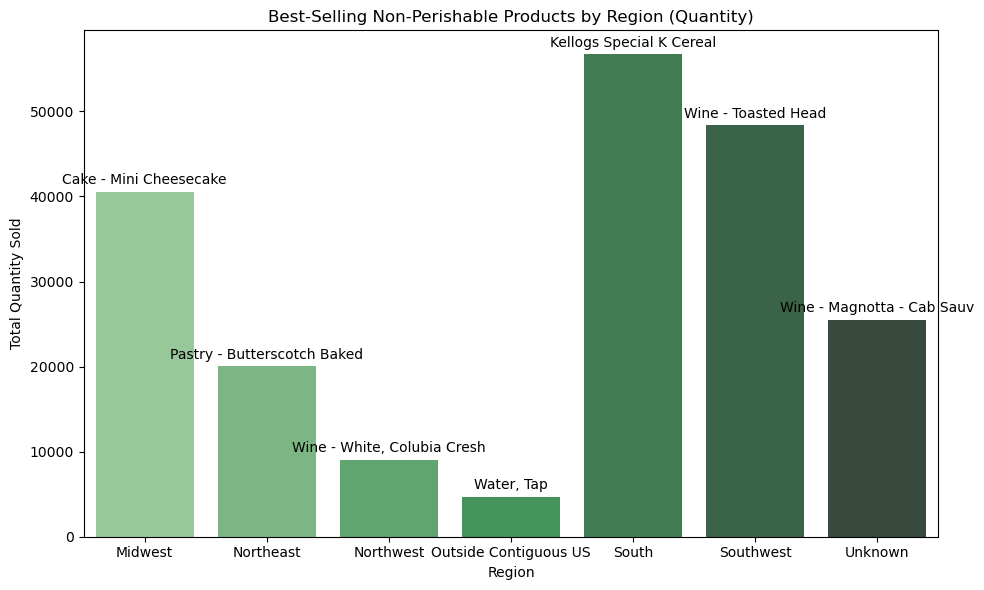

In [13]:
# -------------------------
# 1. Aggregate quantity by Region, ProductType, and ProductName
# -------------------------
agg_qty = sales.groupby(["Region", "ProductType", "ProductName"])["Quantity"].sum().reset_index()

# Identify the best-selling product (highest total quantity) per Region and ProductType
best_sellers_qty = agg_qty.loc[agg_qty.groupby(["Region", "ProductType"])["Quantity"].idxmax()]

print("Best-Selling Products by Region and Product Type (Quantity):")
print(best_sellers_qty)

# -------------------------
# 2. Split the data for each product type
# -------------------------
perishable_best_qty = best_sellers_qty[best_sellers_qty["ProductType"] == "Perishable"].copy()
non_perishable_best_qty = best_sellers_qty[best_sellers_qty["ProductType"] == "Non-Perishable"].copy()

# Sort by Region for consistent ordering on the x-axis
perishable_best_qty.sort_values("Region", inplace=True)
non_perishable_best_qty.sort_values("Region", inplace=True)

# -------------------------
# 3. Plotting Best-Selling Perishable Products by Region (Quantity)
# -------------------------
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(
    data=perishable_best_qty,
    x="Region",
    y="Quantity",
    palette="Blues_d"
)
plt.title("Best-Selling Perishable Products by Region (Quantity)")
plt.xlabel("Region")
plt.ylabel("Total Quantity Sold")

# Annotate each bar with the product name
for i, patch in enumerate(ax1.patches):
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    product_name = perishable_best_qty.iloc[i]["ProductName"]
    ax1.text(x_center, height + (0.01 * perishable_best_qty["Quantity"].max()), product_name,
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

# -------------------------
# 4. Plotting Best-Selling Non-Perishable Products by Region (Quantity)
# -------------------------
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    data=non_perishable_best_qty,
    x="Region",
    y="Quantity",
    palette="Greens_d"
)
plt.title("Best-Selling Non-Perishable Products by Region (Quantity)")
plt.xlabel("Region")
plt.ylabel("Total Quantity Sold")

# Annotate each bar with the product name
for i, patch in enumerate(ax2.patches):
    height = patch.get_height()
    x_center = patch.get_x() + patch.get_width() / 2
    product_name = non_perishable_best_qty.iloc[i]["ProductName"]
    ax2.text(x_center, height + (0.01 * non_perishable_best_qty["Quantity"].max()), product_name,
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()